<a href="https://colab.research.google.com/github/rajivnexgen/eda_icc_worlcup/blob/main/Assignment_Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## Fit polynomial regression on this dataset for degrees 1 to 10. To do such a regression, consider only one variable and then run polynomial fit and plot the train and test errors w.r.t model complexity. You can also repeat this experiment for all the other variables. Also do not use <code>np.polyfit</code>function, but use the <code>LinearRegression()</code> using the scikit-learn library.</b>

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston_dataset=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
df["MEDV"]=boston_dataset.target

In [ ]:
df["MEDV"].max()

50.0

In [ ]:
#check null value
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


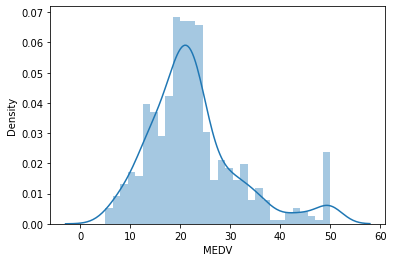

In [ ]:
sns.distplot(df["MEDV"],bins=30)
plt.show()

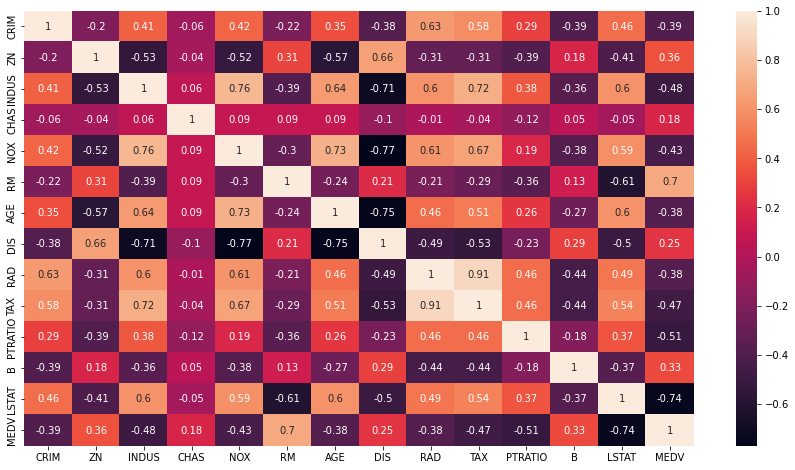

In [ ]:
corrmatrix=df.corr().round(2)
plt.figure(figsize=(15,8))
sns.heatmap(corrmatrix,annot=True)
plt.show()

In [ ]:
# for i in df.columns:
#   plt.plot(df["MEDV"],df[i],"b.")
#   plt.xlabel("MEDV(Target)")
#   plt.ylabel(i)
#   plt.legend()
#   plt.show()

In [ ]:
#sns.pairplot(df,hue='MEDV')

In [ ]:
# X=df["LSTAT"]
X=df[list(set(df.columns)-{"MEDV","CHAS"})].values
Y=df["MEDV"].values

In [ ]:
#let's separatete independent and dependent variables
# X=df.iloc[:,:-1].values
# Y=df["MEDV"].values

In [ ]:
X.shape

(506, 12)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
#split in train test
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [ ]:
# X_train=X_train.values.reshape(-1,1)
# X_test=X_test.values.reshape(-1,1)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)


In [ ]:
#train model
regressor=LinearRegression()
regressor.fit(X_train_poly,Y_train)

LinearRegression()

In [ ]:
Y_pred=regressor.predict(X_test_poly)

In [ ]:
#test r2 score
r2_score(Y_test,Y_pred)

0.7529011204262025

In [ ]:
X_train_pred=regressor.predict(X_train_poly)

In [ ]:
#train r2 score
r2_score(Y_train,X_train_pred)

0.9372179084256578

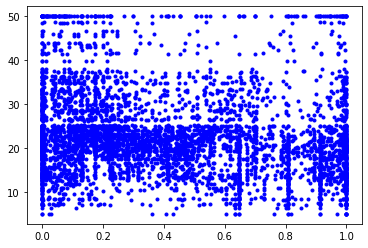

In [ ]:
 import numpy as np
#  x=np.linspace(0,1,200).reshape(200,1)
#  x_poly=poly.transform(x)
#  y=regressor.predict(x_poly)
plt.plot(X_train,Y_train,"b.")
# plt.plot(x,y,"r-")


